# **Pokemon Go**

<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

Created by Huu Hung Nguyen (ID: 017051866)

Last updated: Nov 26, 2024

Learning outcomes:
In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

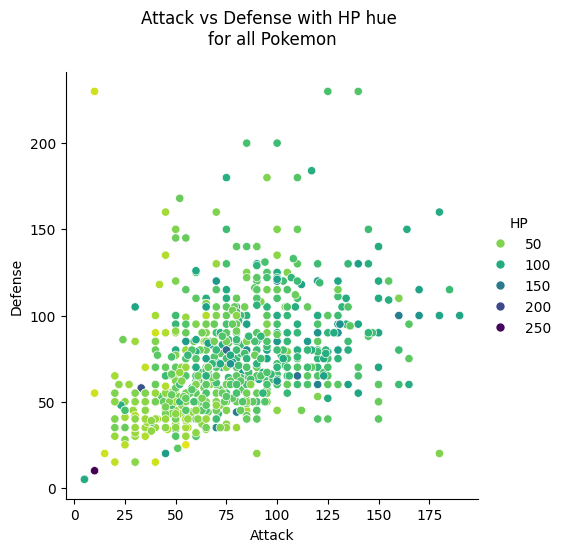

In [5]:
sns.relplot(data=df,
           x='Attack',
           y='Defense',
           hue='HP',
           palette='viridis_r')
plt.title('Attack vs Defense with HP hue \nfor all Pokemon', pad=20);

From the plot, I observed the positive correlationship between `Attack` and `Defense`. As the `Attack` stat increases, `Defense` tends to increase as well, although the spread becomes wider at higher values of `Attack`. In general, `HP` seems to be higher for characters that have higher `Attack` and `Defense` values.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `jointplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

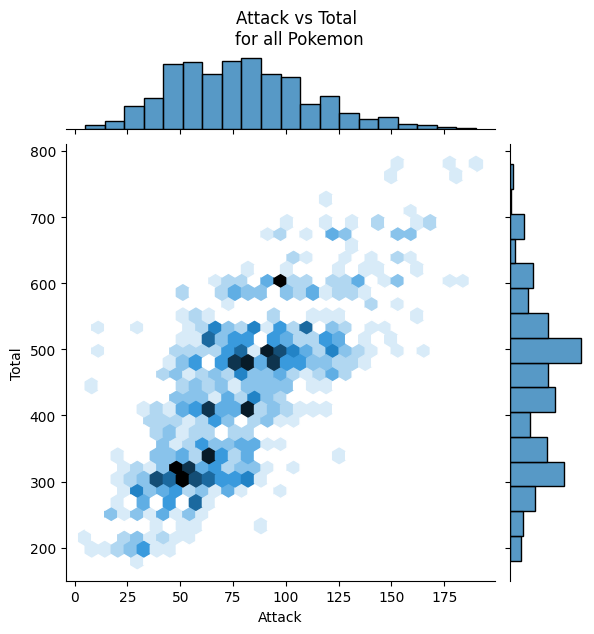

In [6]:
g = sns.jointplot(data=df,
                  x='Attack',
                  y='Total',
                  kind='hex',
                  gridsize=30)
g.fig.suptitle('Attack vs Total \nfor all Pokemon', y=1.05);

- The hexbin plot displays the positive correlation between `Attack` and `Total`. As the `Attack` value increases, the `Total` score also tends to increase.
- From the plot, I also observed the marginal histograms:
  + The top histogram shows that the `Attack` values of most Pokemon fall between 50 and 100, with fewer Pokemon having very low or very high `Attack` values.
  + The right histogram shows that the `Total` stat for most Pokemon falls between 300 and 600, with fewer Pokemon having very low or very high `Total` values.


## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

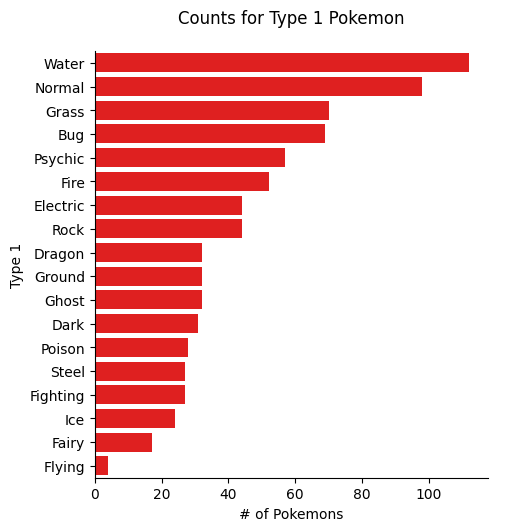

In [7]:
sns.catplot(data=df,
            y='Type 1',
            kind='count',
            color='red',
            order=df['Type 1'].value_counts().index
            ).set_axis_labels('# of Pokemons', 'Type 1')
plt.title("Counts for Type 1 Pokemon", pad=20);

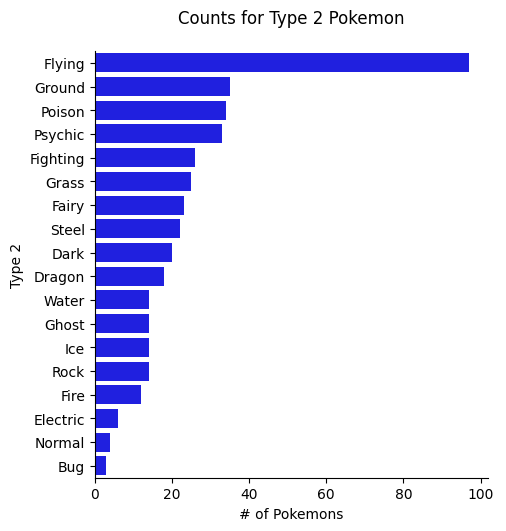

In [9]:
sns.catplot(data=df,
            y='Type 2',
            kind='count',
            color='blue',
            order=df['Type 2'].value_counts().index
            ).set_axis_labels('# of Pokemons', 'Type 2')
plt.title("Counts for Type 2 Pokemon", pad=20);

### Ans:
- In Type 1:
  + The most common Pokemons are `Water` and `Normal`
  + The most rare Pokemons are `Flying` and `Fairy`
- In Type 2:
  + The most common Pokemons are `Flying` and `Ground`
  + The most rare Pokemons are `Bug` and `Normal`